# Flight Price Prediction

Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

 

Note: You can find the dataset in the link below. 



Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects

In [1019]:
#Importing required packages & libraries.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

In [1020]:
#Loading the dataset
#importing data
df_train=pd.read_excel(r"C:\Users\HP\Desktop\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")

df_test=pd.read_excel(r"C:\Users\HP\Desktop\Flight_Ticket_Participant_Datasets\Test_set.xlsx")


print("Train dataset shape:", df_train.shape)
print("Test dataset shape:", df_test.shape)


Train dataset shape: (10683, 11)
Test dataset shape: (2671, 10)


In [1021]:
#printing the head of the train dataset
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [1022]:
#printing the head of the test dataset
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


We have two datasets, train and test. We will first try to find out how the train data performs, on that basis we will deal with the test data. 

In [1023]:
df_train.info()   #information about the train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [1024]:
df_test.info()   #information about the test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


We can see the train data has 2 null values but test data has none. We will treat them going forward.

In [1025]:
# displays all the rows in the dataset
pd.set_option("display.max_rows",None)

In [1026]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [1027]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There are nulls in the training dataset in the Route and Total_Stops columns. 

In [1028]:
#describe about the train data
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [1029]:
#describe about the test data
df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [1030]:
df_train.isnull().sum() #checking null values in train data

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We can see there are null values in Route and Total Shops column. So, we will drop them. Also we will check the samjhe in the test dataset.

In [1031]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Here we got a detailed info about our target column 'Price' where the mean=9087.06, standard deviation=4611.35, min=1759, max=79512, 25%=5277, 50%=8372 and 75%=12372.

In [1032]:
# It seems we have nulls so we will use the imputer strategy.
Missing = pd.concat([df_train.isnull().sum(), df_test.isnull().sum()], axis=1, keys=['train', 'test'])
Missing[Missing.sum(axis=1) > 0]

,train,test
Route,1,0.0
Total_Stops,1,0.0


In [1033]:
#drop the null values from the train data and rechecking for null values
df_train.dropna(inplace=True)

df_train.isnull().sum() #checking null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

We can see the null values are now removed. 

Lets now apply other preprocessing steps on the train dataset. 

In [1034]:
df_train.dtypes # understand the datatypes of the training set

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [1035]:
df_test.dtypes # understand the datatypes of the test set

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

Looks like there are several categorical data. We will have to change them to numerical. Let's also make sure the data and time columns are changed. 

We will work with the training data first.

In [1036]:
def change_into_datetime(col):
    df_train[col]=pd.to_datetime(df_train[col])

In [1037]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [1038]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [1039]:
df_train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Let us now extract day and month from the Date_of_journey column and store it into two seperate columns.
Thereafter, we will drop the 'Date_of_Journey' column.

In [1040]:
df_train['journey_day']=df_train['Date_of_Journey'].dt.day
df_train['journey_month']=df_train['Date_of_Journey'].dt.month

In [1041]:
df_train.drop('Date_of_Journey', axis=1, inplace=True) #dropping the Date_of_Journey column and printing first 10 rows

df_train.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-08-28 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-28 05:50:00,2022-08-28 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-08-28 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-08-28 18:05:00,2022-08-28 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-08-28 16:50:00,2022-08-28 21:35:00,4h 45m,1 stop,No info,13302,3,1
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2022-08-28 09:00:00,2022-08-28 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-08-28 18:55:00,2022-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-08-28 08:00:00,2022-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-08-28 08:55:00,2022-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2022-08-28 11:25:00,2022-08-28 19:15:00,7h 50m,1 stop,No info,8625,27,5


Now from the Arrival_time and Dept_time columns, we will extract hour and minutes and store them into new columns and drop these columns respectively. 

In [1042]:
# extracting hour and minutes
def extract_hour(data,col):
    df_train[col+'_hour']=df_train[col].dt.hour
    
def extract_min(data,col):
    df_train[col+'_min']=df_train[col].dt.minute
    

def drop_col(data,col):
    df_train.drop(col,axis=1,inplace=True)

In [1043]:
#call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df_train,'Dep_Time')

#extracting minutes
extract_min(df_train,'Dep_Time')

#drop the column
drop_col(df_train,'Dep_Time')

In [1044]:
#extracting hour
extract_hour(df_train,'Arrival_Time')

#extracting min
extract_min(df_train,'Arrival_Time')


#drop the column
drop_col(df_train,'Arrival_Time')

In [1045]:
df_train.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


Let us apply pre-processing on duration column, separate the Duration hours and minute from duration

In [1046]:
duration=list(df_train['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [1047]:
df_train['Duration']=duration

In [1048]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [1049]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [1050]:
df_train['dur_hour']=df_train['Duration'].apply(hour)

df_train['dur_min']=df_train['Duration'].apply(minutes)

In [1051]:
drop_col(df_train,'Duration')

In [1052]:
df_train.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [1053]:
df_train['dur_hour'] = df_train['dur_hour'].astype(int)
df_train['dur_min'] = df_train['dur_min'].astype(int)

In [1054]:
df_train.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int32
dur_min               int32
dtype: object

Lets now apply the same to the test data

In [1055]:
df_test.dtypes # datatypes of the test data

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [1056]:
def change_into_datetime(col):
    df_test[col]=pd.to_datetime(df_test[col])

In [1057]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [1058]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [1059]:
df_test.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

Now ,we extract day and month from Date_of_journey and stored in 2 other columns.
Then there will be no use of 'Date_of_Journey' column,so we drop it.

In [1060]:
df_test['journey_day']=df_test['Date_of_Journey'].dt.day
df_test['journey_month']=df_test['Date_of_Journey'].dt.month

In [1061]:
df_test.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2022-08-28 17:30:00,2022-06-07 04:25:00,10h 55m,1 stop,No info,6,6
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2022-08-28 06:20:00,2022-08-28 10:20:00,4h,1 stop,No info,5,12
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2022-08-28 19:15:00,2022-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2022-08-28 08:00:00,2022-08-28 21:00:00,13h,1 stop,No info,21,5
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2022-08-28 23:55:00,2022-06-25 02:45:00,2h 50m,non-stop,No info,24,6
5,Jet Airways,2019-12-06,Delhi,Cochin,DEL → BOM → COK,2022-08-28 18:15:00,2022-06-13 12:35:00,18h 20m,1 stop,In-flight meal not included,6,12
6,Air India,2019-12-03,Banglore,New Delhi,BLR → TRV → DEL,2022-08-28 07:30:00,2022-08-28 22:35:00,15h 5m,1 stop,No info,3,12
7,IndiGo,2019-01-05,Kolkata,Banglore,CCU → HYD → BLR,2022-08-28 15:15:00,2022-08-28 20:30:00,5h 15m,1 stop,No info,5,1
8,IndiGo,2019-03-15,Kolkata,Banglore,CCU → BLR,2022-08-28 10:10:00,2022-08-28 12:55:00,2h 45m,non-stop,No info,15,3
9,Jet Airways,2019-05-18,Kolkata,Banglore,CCU → BOM → BLR,2022-08-28 16:30:00,2022-08-28 22:35:00,6h 5m,1 stop,No info,18,5


In [1062]:
df_test.drop('Date_of_Journey', axis=1, inplace=True)

In [1063]:
# function for extracting hour and minutes
def extract_hour(data,col):
    df_test[col+'_hour']=df_test[col].dt.hour
    
def extract_min(data,col):
    df_test[col+'_min']=df_test[col].dt.minute
    

def drop_col(data,col):
    df_test.drop(col,axis=1,inplace=True)

In [1064]:
#call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df_test,'Dep_Time')

#extracting minutes
extract_min(df_test,'Dep_Time')

#drop the column
drop_col(df_test,'Dep_Time')

In [1065]:
#extracting hour
extract_hour(df_test,'Arrival_Time')

#extracting min
extract_min(df_test,'Arrival_Time')


#drop the column
drop_col(df_test,'Arrival_Time')

In [1066]:
df_test.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45
5,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18h 20m,1 stop,In-flight meal not included,6,12,18,15,12,35
6,Air India,Banglore,New Delhi,BLR → TRV → DEL,15h 5m,1 stop,No info,3,12,7,30,22,35
7,IndiGo,Kolkata,Banglore,CCU → HYD → BLR,5h 15m,1 stop,No info,5,1,15,15,20,30
8,IndiGo,Kolkata,Banglore,CCU → BLR,2h 45m,non-stop,No info,15,3,10,10,12,55
9,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,6h 5m,1 stop,No info,18,5,16,30,22,35


In [1067]:
duration=list(df_test['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [1068]:
df_test['Duration']=duration

In [1069]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h 0m,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h 0m,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [1070]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [1071]:
df_test['dur_hour']=df_test['Duration'].apply(hour)

In [1072]:
df_test['dur_min']=df_test['Duration'].apply(minutes)

In [1073]:
df_test.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h 0m,1 stop,No info,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h 0m,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45,2,50
5,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18h 20m,1 stop,In-flight meal not included,6,12,18,15,12,35,18,20
6,Air India,Banglore,New Delhi,BLR → TRV → DEL,15h 5m,1 stop,No info,3,12,7,30,22,35,15,5
7,IndiGo,Kolkata,Banglore,CCU → HYD → BLR,5h 15m,1 stop,No info,5,1,15,15,20,30,5,15
8,IndiGo,Kolkata,Banglore,CCU → BLR,2h 45m,non-stop,No info,15,3,10,10,12,55,2,45
9,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,6h 5m,1 stop,No info,18,5,16,30,22,35,6,5


In [1074]:
drop_col(df_test,'Duration')

In [1075]:
df_test.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [1076]:
df_test['dur_hour'] = df_test['dur_hour'].astype(int)
df_test['dur_min'] = df_test['dur_min'].astype(int)

In [1077]:
df_test.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int32
dur_min               int32
dtype: object

Finding the categorical value in both the training and test datasets

In [1078]:
column_train=[column for column in df_train.columns if df_train[column].dtype=='object']
column_train

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [1079]:
column_test=[column for column in df_test.columns if df_test[column].dtype=='object']
column_test

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

Finding the continuous value in both the training ans test datasets

In [1080]:
continuous_train =[column for column in df_train.columns if df_train[column].dtype!='object']
continuous_train

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

In [1081]:
continuous_test =[column for column in df_test.columns if df_test[column].dtype!='object']
continuous_test

['journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

Handling categorical data

We will use two main Encoding Techniques to covert Categorical data into numerical.

In [1082]:
categorical_train = df_train[column_train]
categorical_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [1083]:
categorical_test = df_test[column_test]
categorical_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info


In [1084]:
categorical_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [1085]:
categorical_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

# Data Visualization

Here we will only use the train dataset to visualize the datas. 

Airline vs Price Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

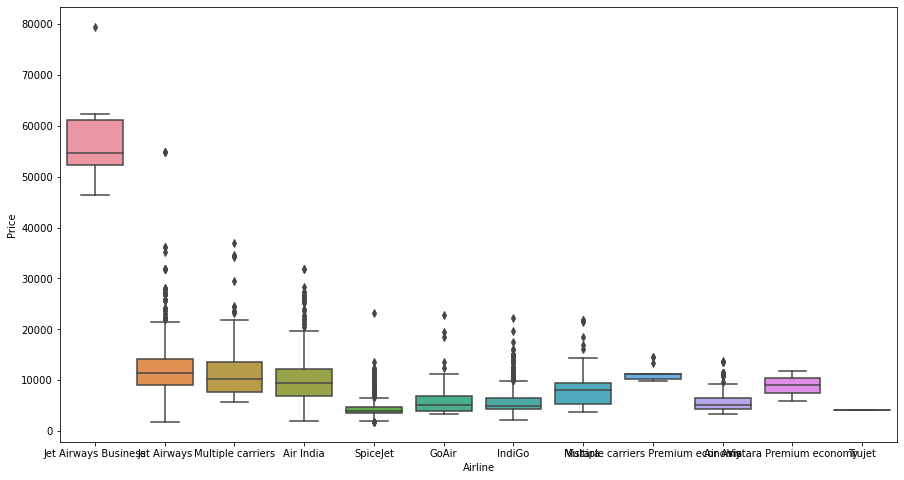

In [1086]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df_train.sort_values('Price',ascending=False))

It can be clearly seen that Jet Airways Business has the maximum Price of tickets. Other Airlines operators are having more or less similar flight charges.

Perform Total_Stops vs Price Analysis

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

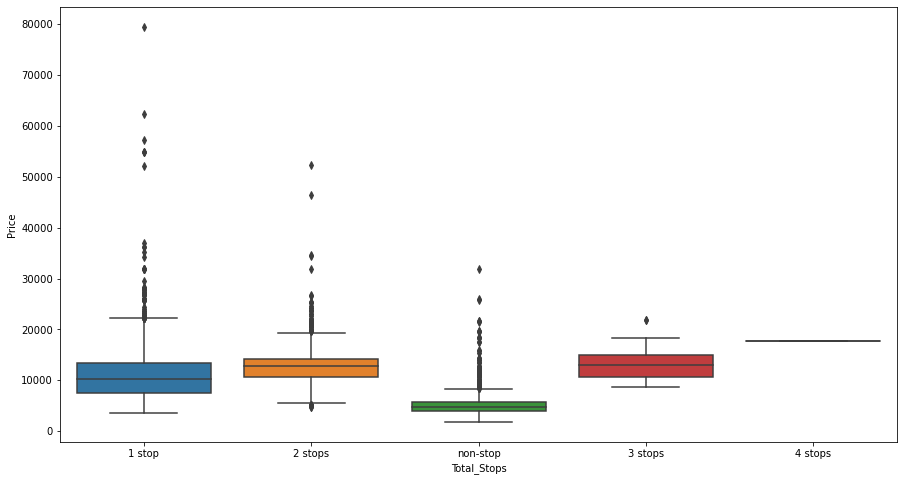

In [1087]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df_train.sort_values('Price',ascending=False))

Before we send use our data to build model, we will apply encoding to both our datasets so that they are completely ready for machine learning. 

In [1088]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline_train=pd.get_dummies(categorical_train['Airline'],drop_first=True)
                        
Airline_test=pd.get_dummies(categorical_test['Airline'],drop_first=True)

In [1089]:
Airline_train.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [1090]:
Airline_test.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [1091]:
categorical_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [1092]:
categorical_test['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

<Figure size 1080x1080 with 0 Axes>

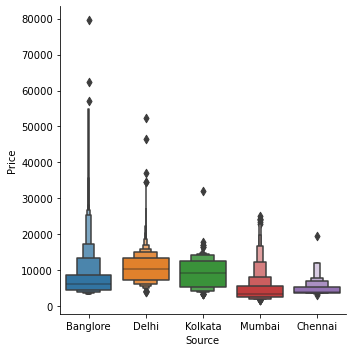

In [1093]:
#Source vs Price

plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df_train.sort_values('Price',ascending=False),kind='boxen')

In [1094]:
#encoding of source column for the training data
source_train=pd.get_dummies(categorical_train['Source'],drop_first=True)
source_train.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [1095]:
#encoding of source column for the test data
source_test=pd.get_dummies(categorical_test['Source'],drop_first=True)
source_test.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [1096]:
categorical_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [1097]:
categorical_test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

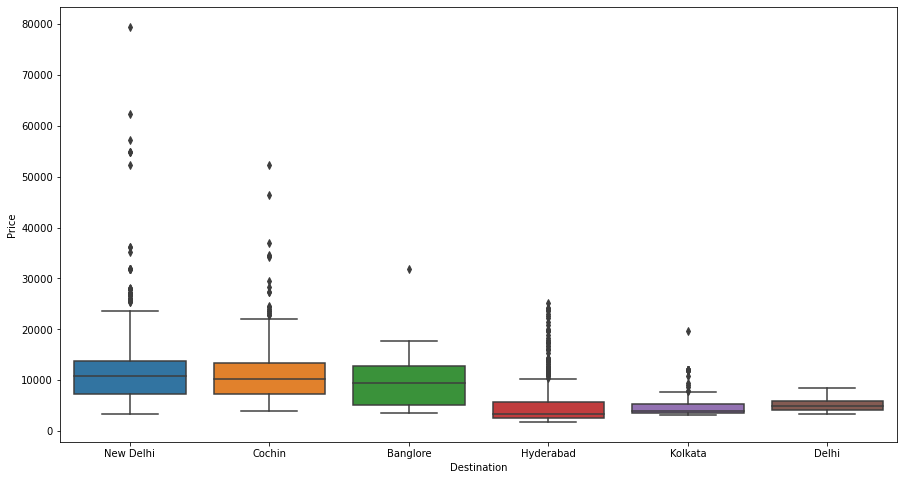

In [1098]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df_train.sort_values('Price',ascending=False))

In [1099]:
#encoding of destination column
destination_train=pd.get_dummies(categorical_train['Destination'],drop_first=True)
destination_train.head()


,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [1100]:
#encoding of destination column
destination_test=pd.get_dummies(categorical_test['Destination'],drop_first=True)
destination_test.head()


,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [1101]:
# now we will work on the route column
categorical_train['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → JAI → BOM → COK                 240
DEL → BLR → COK                       232
DEL → COK                             213
DEL → AMD → BOM → COK                 205
DEL → MAA → COK                       146
DEL → IDR → BOM → COK                  99
DEL → HYD → MAA → COK                  83
DEL → NAG → BOM → COK                  71
CCU → MAA → BLR                        65
DEL → GOI → BOM → COK                  58
DEL → HYD → BOM → COK                  56
CCU → HYD → BLR                        53
CCU → BBI → BLR                        50
DEL → BHO → BOM → COK                  50
CCU → IXR → DEL → BLR             

In [1102]:
categorical_test['Route'].value_counts()

DEL → BOM → COK                      624
BLR → DEL                            389
CCU → BOM → BLR                      253
CCU → BLR                            172
BOM → HYD                            164
CCU → DEL → BLR                      124
BLR → BOM → DEL                      107
DEL → HYD → COK                       85
MAA → CCU                             75
DEL → JAI → BOM → COK                 74
DEL → BLR → COK                       55
DEL → COK                             49
DEL → MAA → COK                       44
DEL → AMD → BOM → COK                 41
CCU → HYD → BLR                       27
DEL → IDR → BOM → COK                 18
DEL → HYD → MAA → COK                 17
DEL → CCU → BOM → COK                 15
DEL → GOI → BOM → COK                 15
CCU → MAA → BLR                       13
DEL → HYD → BOM → COK                 12
DEL → NAG → BOM → COK                 12
CCU → DEL → COK → BLR                 12
DEL → ATQ → BOM → COK                 11
CCU → BBI → BOM 

In [1103]:
categorical_train['Route1']=categorical_train['Route'].str.split('→').str[0]
categorical_train['Route2']=categorical_train['Route'].str.split('→').str[1]
categorical_train['Route3']=categorical_train['Route'].str.split('→').str[2]
categorical_train['Route4']=categorical_train['Route'].str.split('→').str[3]
categorical_train['Route5']=categorical_train['Route'].str.split('→').str[4]

In [1104]:
categorical_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [1105]:
categorical_test['Route1']=categorical_test['Route'].str.split('→').str[0]
categorical_test['Route2']=categorical_test['Route'].str.split('→').str[1]
categorical_test['Route3']=categorical_test['Route'].str.split('→').str[2]
categorical_test['Route4']=categorical_test['Route'].str.split('→').str[3]
categorical_test['Route5']=categorical_test['Route'].str.split('→').str[4]

In [1106]:
categorical_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,DEL,BOM,COK,NaN,NaN
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,CCU,MAA,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,DEL,BOM,COK,NaN,NaN
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,DEL,BOM,COK,NaN,NaN
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN


In [1107]:
categorical_train_set=categorical_train.drop('Route',axis=1)

categorical_train_set.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [1108]:
categorical_train_set.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [1109]:
categorical_test_set=categorical_test.drop('Route', axis=1)

categorical_test_set.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Route1                0
Route2                0
Route3              849
Route4             2280
Route5             2659
dtype: int64

In [1110]:
categorical_test_set.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [1111]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical_train_set[i].fillna('None',inplace=True)

In [1112]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical_test_set[i].fillna('None',inplace=True)

In [1113]:
categorical_train_set.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [1114]:
categorical_test_set.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [1115]:
for i in categorical_train_set.columns:
    print('{} has total {} categories'.format(i,len(categorical_train_set[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


In [1116]:
for i in categorical_test_set.columns:
    print('{} has total {} categories'.format(i,len(categorical_test_set[i].value_counts())))

Airline has total 11 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 6 categories
Route1 has total 5 categories
Route2 has total 39 categories
Route3 has total 28 categories
Route4 has total 10 categories
Route5 has total 5 categories


<AxesSubplot:xlabel='Arrival_Time_hour', ylabel='Price'>

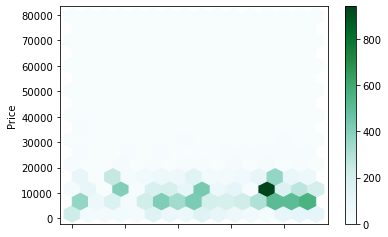

In [1117]:
df_train.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

In [1118]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [1119]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5', 'Total_Stops']:
    categorical_train_set[i]=encoder.fit_transform(categorical_train[i])

In [1120]:
for j in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5', 'Total_Stops']:
    categorical_test_set[j]=encoder.fit_transform(categorical_test[j])

In [1121]:
categorical_train_set.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,4,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,1,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,1,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,0,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,0,No info,0,34,8,13,5


In [1122]:
categorical_test_set.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,Jet Airways,Delhi,Cochin,0,No info,3,7,5,9,4
1,IndiGo,Kolkata,Banglore,0,No info,2,29,3,9,4
2,Jet Airways,Delhi,Cochin,0,In-flight meal not included,3,7,5,9,4
3,Multiple carriers,Delhi,Cochin,0,No info,3,7,5,9,4
4,Air Asia,Banglore,Delhi,4,No info,0,13,27,9,4


After all preprocessing, Our data is ready for the modeling

In [1123]:
final_train_df=pd.concat([categorical_train_set,Airline_train,source_train,destination_train,df_train[continuous_train]],axis=1)

In [1124]:
final_train_df = final_train_df.drop(['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1)

In [1125]:
final_train_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,4,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,1,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,1,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,0,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,0,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [1126]:
final_test_df=pd.concat([categorical_test,Airline_test,source_test,destination_test,df_test[continuous_test]],axis=1)

In [1127]:
final_test_df = final_test_df.drop(['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1)

In [1128]:
final_test_df.head()

,Route,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,...,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,DEL → BOM → COK,1 stop,DEL,BOM,COK,NaN,NaN,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,6,6,17,30,4,25,10,55
1,CCU → MAA → BLR,1 stop,CCU,MAA,BLR,NaN,NaN,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,5,12,6,20,10,20,4,0
2,DEL → BOM → COK,1 stop,DEL,BOM,COK,NaN,NaN,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,21,5,19,15,19,0,23,45
3,DEL → BOM → COK,1 stop,DEL,BOM,COK,NaN,NaN,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,21,5,8,0,21,0,13,0
4,BLR → DEL,non-stop,BLR,DEL,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,24,6,23,55,2,45,2,50


In [1129]:
pd.set_option('display.max_columns',33)
final_train_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,4,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,1,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,1,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,0,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,0,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


Checking Outliers in the train dataset

In [1130]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

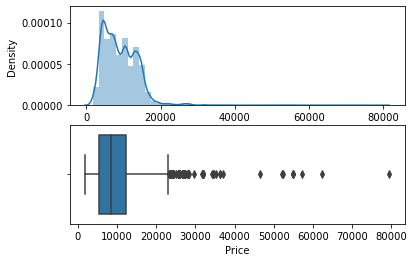

In [1131]:
plot(final_train_df,'Price')

Handling outliers:
As there is some outliers in price feature,so we replace it with median.

In [1132]:
final_train_df['Price']=np.where(final_train_df['Price']>=40000,final_train_df['Price'].median(),final_train_df['Price'])

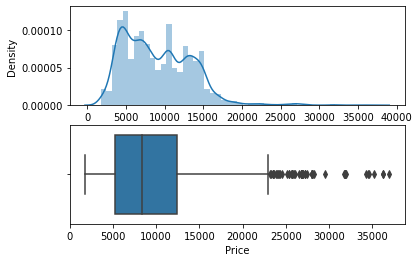

In [1133]:
plot(final_train_df,'Price')

In [1134]:
final_train_df.head(5)

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,4,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3897.0,24,3,22,20,1,10,2,50
1,1,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,7662.0,5,1,5,50,13,15,7,25
2,1,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,13882.0,6,9,9,25,4,25,19,0
3,0,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6218.0,5,12,18,5,23,30,5,25
4,0,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,13302.0,3,1,16,50,21,35,4,45


Seperate the dataset in X and Y columns

In [1136]:
X=final_train_df.drop('Price',axis=1)
y=df_train['Price']

Feature Selection:

For this we use mutual_info_classif

In [1137]:
from sklearn.feature_selection import mutual_info_classif

In [1138]:
mutual_info_classif(X,y)

array([1.5610535 , 2.0543334 , 2.78403197, 2.33467061, 1.51709536,
       0.69306828, 0.78778476, 0.10594722, 0.67537179, 0.93245033,
       0.        , 0.57251506, 0.01410016, 0.32196924, 0.        ,
       0.21319695, 0.        , 0.18022769, 1.50112861, 0.8838364 ,
       0.28458737, 1.5554796 , 0.41562046, 0.28936179, 0.16486865,
       0.38994135, 1.10340245, 0.85975689, 1.42995674, 1.20401754,
       1.87127967, 1.53768129, 1.78663073, 1.06314364])

In [1139]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,1.549432
Route1,2.029341
Route2,2.749213
Route3,2.274772
Route4,1.477280
Route5,0.786707
Air India,0.765920
GoAir,0.103903
IndiGo,0.659952
Jet Airways,0.911824


In [1140]:
imp.columns=['Importance']
imp.sort_values(by='Importance',ascending=False)

,Importance
Route2,2.749213
Route3,2.274772
Route1,2.029341
Arrival_Time_hour,1.854157
dur_hour,1.800709
Delhi,1.560158
Total_Stops,1.549432
Cochin,1.528073
Arrival_Time_min,1.519792
Route4,1.477280


From the above we get to understand the data that are most important for the prediction of the prices. The data is arranged as per their relevance. The first indicated the most important and the the last one the least.

As we can see from the table, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing it.

Building Models

In [1141]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [1142]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions) 

In [1143]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR

Model is: RandomForestRegressor()
Training score: 0.9535593182381619
Predictions are: [ 8490.63       16873.41       13513.61183333 ...  3849.77
  5539.78       10656.56      ]


r2 score is: 0.8367179233490452
MAE:1090.348111182012
MSE:3144107.0183939673
RMSE:1773.1629982587522


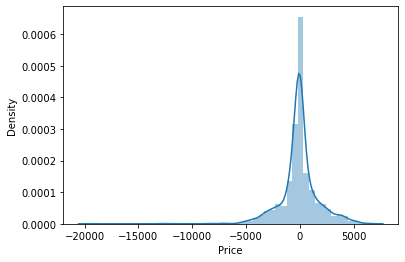

In [1144]:
predict(RandomForestRegressor())

The accuracy of Random forest as we can see is 84%.

Model is: LogisticRegression()
Training score: 0.34523112931538913
Predictions are: [14571 15237 10844 ...  4226  6147 10262]


r2 score is: 0.43647616039824944
MAE:1870.0131024801124
MSE:10851033.349555451
RMSE:3294.090671119338


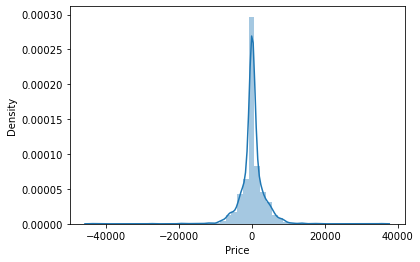

In [1145]:
predict(LogisticRegression())

The accuracy of Logistic regression as we can see is only 43%.

Model is: DecisionTreeRegressor()
Training score: 0.9701124435927416
Predictions are: [ 8996. 18550. 14571. ...  3943.  5054. 10262.]


r2 score is: 0.756229858791784
MAE:1239.4868975198876
MSE:4693959.236481568
RMSE:2166.554692704887


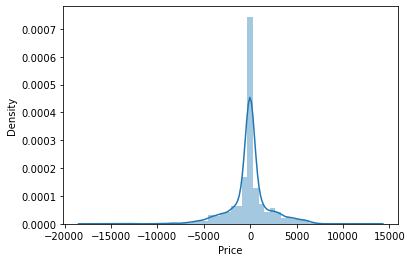

In [1146]:
predict(DecisionTreeRegressor())

The accuracy of Decision Tree is 73%

Model is: KNeighborsRegressor()
Training score: 0.7471097820264734
Predictions are: [10401.2 16362.4 12933.2 ...  4210.   8182.6 11232.4]


r2 score is: 0.6531097473275774
MAE:1701.818905007019
MSE:6679606.852204024
RMSE:2584.4935388203285


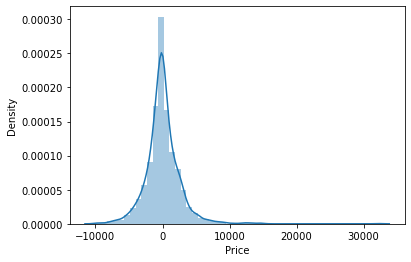

In [1147]:
predict(KNeighborsRegressor())

The accuracy of KN Regressor is 65%

Model is: SVR()
Training score: 0.03732156637808348
Predictions are: [8529.08236337 8268.53762489 8460.72186782 ... 8293.97473971 8454.41785643
 8540.02321614]


r2 score is: 0.05312864545382845
MAE:3326.0738164242803
MSE:18232649.488583118
RMSE:4269.970666009676


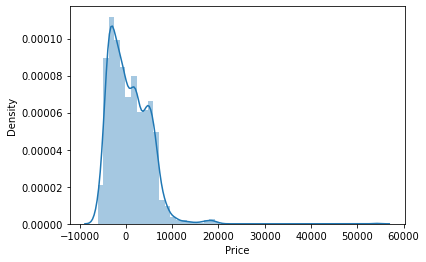

In [1148]:
predict(SVR())

The accuracy of SVR is very less. Only 5%.

Model is: GradientBoostingRegressor()
Training score: 0.8004872305794601
Predictions are: [ 5702.86974497 17826.76035345 12133.74946613 ...  4547.37535805
  6959.32889786 11428.58468176]


r2 score is: 0.8168061188758857
MAE:1397.4505612819867
MSE:3527522.3048542095
RMSE:1878.1699350309625


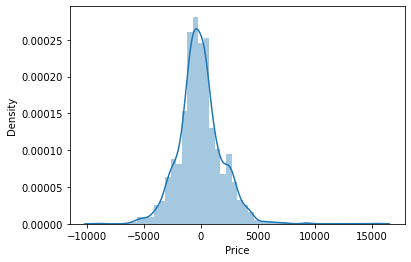

In [1149]:
predict(GradientBoostingRegressor())

The accuracy of Gradient Boosting Regressor is 80%.

Hypertunning

In [1150]:
from sklearn.model_selection import RandomizedSearchCV

In [1151]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [1152]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=5,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 220, 'max_features': 'auto', 'max_depth': 10}

In [1153]:
# best parameter
rf_random.best_params_

{'n_estimators': 220, 'max_features': 'auto', 'max_depth': 10}

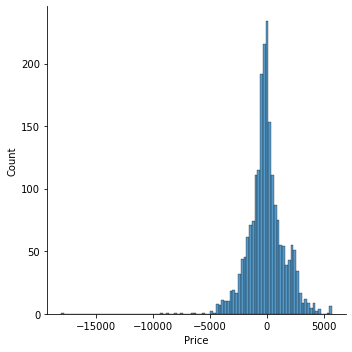

In [1154]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [1155]:
r2_score(y_test,prediction)

0.8631491639992108

We can see that from the above models Random Forest has the highest accuracy of 84%. The prediction score increased to 86% after Hypertuning the model. 